In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
len(df)

7043

In [4]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Pre-Processing

In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
string_cols = list(df.dtypes[df.dtypes=='object'].index)
for col in string_cols:
    df[col] = df[col].str.lower().str.replace(' ','_')
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [6]:
df.dtypes
# Total Charges has been given the wrong type due to " " being assigned to empty entries

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [7]:
# errors coerce forces to_numeric to convert string values to NaN
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
# converting 'Yes' and 'No' to binary 1 and 0 respectively
df.churn = (df.churn=='yes').astype(int)

In [9]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

### EDA

In [10]:
# check for null values
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [11]:
df_train_full.churn.value_counts()
# majority did not churn
# 1521 / 5634 = 0.27 = 27%

0    4113
1    1521
Name: churn, dtype: int64

In [12]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [13]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
              'phoneservice', 'multiplelines', 'internetservice',
              'onlinesecurity', 'onlinebackup', 'deviceprotection',
              'techsupport', 'streamingtv', 'streamingmovies',
              'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [14]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### Feature Importance Analysis

In [15]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
print('gender == female:', round(female_mean, 3))
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()
print('gender == male:', round(male_mean, 3))

gender == female: 0.277
gender == male: 0.263


In [16]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes:', round(partner_yes, 3))
partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no:', round(partner_no, 3))

partner == yes: 0.205
partner == no: 0.33


In [17]:
# Calculating Risk Ratio
from IPython.display import display

for col in categorical:
    df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean

    display(df_group)

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [18]:
# Calculating Mutual Information Score (categorical features)
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [19]:
# Calculating Pearson's Correlation Coefficient (numerical features)
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### Feature Engineering


In [20]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [21]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

### Logistic Regression Model


#### Manual Implementation

In [22]:
def linear_reg(xi):
    score = bias
    for j in range(n):
        score += xi[j] * w[j]
    prob = sigmoid(score)
    return prob

In [23]:
import math

def sigmoid(score):
    return 1 / (1 + math.exp(score))

#### sklearn implementation

In [24]:
from sklearn.linear_model import LogisticRegression

# solver is the underlying optimization library
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

### Validation

In [25]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [26]:
y_pred = model.predict_proba(X_val)[:,1]

In [27]:
# setting threshold at 60%
churn = y_pred >= 0.6

In [28]:
(y_val==churn).mean()

0.7897849462365591

### Testing

In [29]:
customer = {
    'customerid': '8879-zkjof',
    'gender': 'female',
    'seniorcitizen': 0,
    'partner': 'no',
    'dependents': 'no',
    'tenure': 41,
    'phoneservice': 'yes',
    'multiplelines': 'no',
    'internetservice': 'dsl',
    'onlinesecurity': 'yes',
    'onlinebackup': 'no',
    'deviceprotection': 'yes',
    'techsupport': 'yes',
    'streamingtv': 'yes',
    'streamingmovies': 'yes',
    'contract': 'one_year',
    'paperlessbilling': 'yes',
    'paymentmethod': 'bank_transfer_(automatic)',
    'monthlycharges': 79.85,
    'totalcharger': 3320.75,
}

In [30]:
def predict_single(customer, dv, model):
    X_train = dv.transform([customer])
    y_pred = model.predict_proba(X_train)[:,1]
    return y_pred[0]

In [31]:
predict_single(customer, dv, model)

0.01757735145374258

## Model Evaluation

### Accuracy


In [32]:
from sklearn.metrics import accuracy_score

# creates array of thresholds (e.g. 0.0, 0.1 ...)
thresholds = np.linspace(0, 1, 20)
accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)

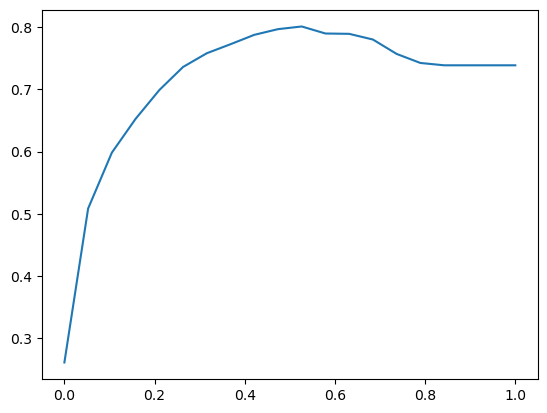

In [33]:
plt.plot(thresholds, accuracies)

### Confusion Table

In [34]:
t = 0.5
predict_churn = y_pred >= t
predict_no_churn = y_pred < t

actual_churn = y_val == 1
actual_no_churn = y_val == 0

tp = (predict_churn & actual_churn).sum()
fp = (predict_churn & actual_no_churn).sum()

fn = (predict_no_churn & actual_churn).sum()
tn = (predict_no_churn & actual_no_churn).sum()

In [35]:
confusion_matrix = np.array([
    [tn, fp],
    [fp, tp]
])

confusion_matrix / confusion_matrix.sum()

array([[0.65504087, 0.09373297],
       [0.09373297, 0.15749319]])

#### Precision

In [36]:
# How many of the postive predictions turned out to be correct
P = tp / (tp + fp)
round(P, 2)

0.63

#### Recall

In [37]:
# How many of the customers that churned did we predict correctly
R = tp / (tp + fn)
round(R, 2)

0.59

### Receiver Opertaing Characteristic (ROC)

In [38]:
# True Positive Rate (TPR)
TPR = tp / (tp + fn)
# False Positive Rate (FPR)
FPR = fp / (fp + tn)

In [39]:
def tpr_fpr_df(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()
        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

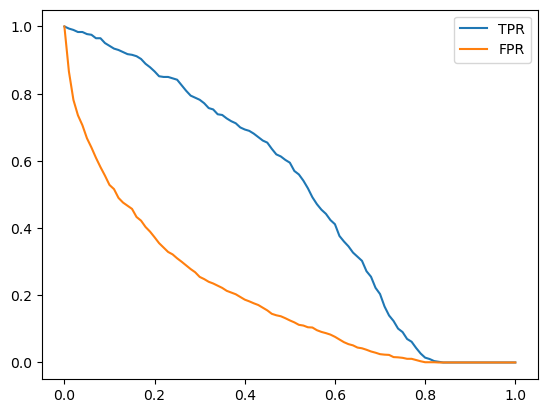

In [40]:
df_scores = tpr_fpr_df(y_val, y_pred)
plt.plot(df_scores.threshold, df_scores.tpr, label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, label='FPR')
plt.legend()

In [41]:
# Created randomly predicting model
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_df(y_val, y_rand)

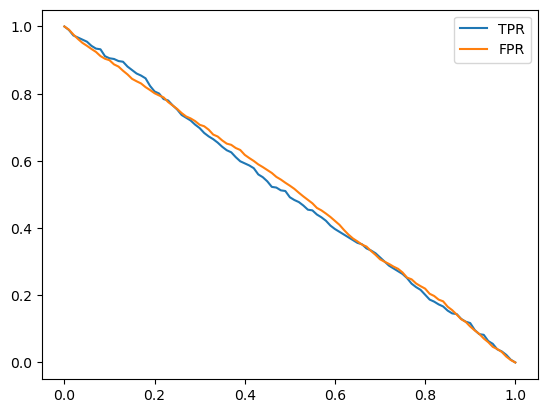

In [42]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR')
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR')
plt.legend()

In [43]:
# Created ideal prediction model
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_pred_ideal = np.linspace(0, 1, num_neg + num_pos)
np.set_printoptions(threshold=np.inf)

df_ideal = tpr_fpr_df(y_ideal, y_pred_ideal)

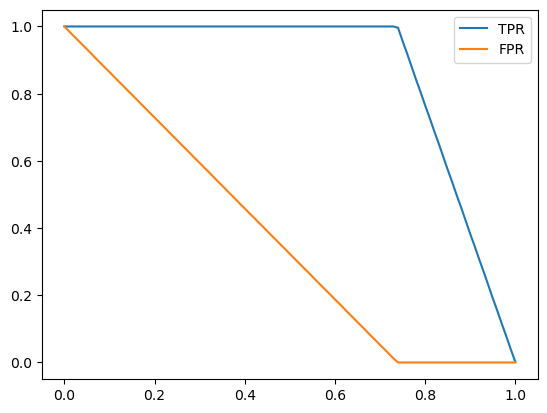

In [44]:
plt.plot(df_ideal.threshold, df_ideal.tpr, label='TPR')
plt.plot(df_ideal.threshold, df_ideal.fpr, label='FPR')
plt.legend()

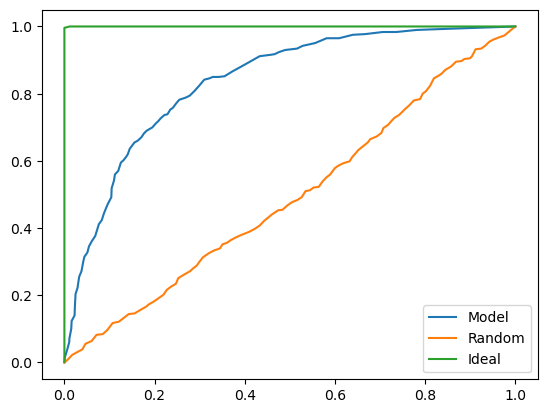

In [45]:
# ROC curve
plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot(df_rand.fpr, df_rand.tpr, label='Random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='Ideal')

plt.legend()

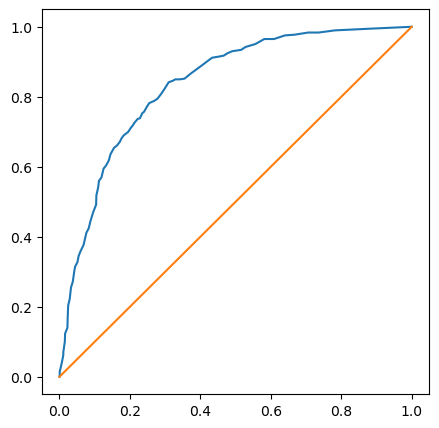

In [46]:
# ROC curve simplified
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1], [0,1])

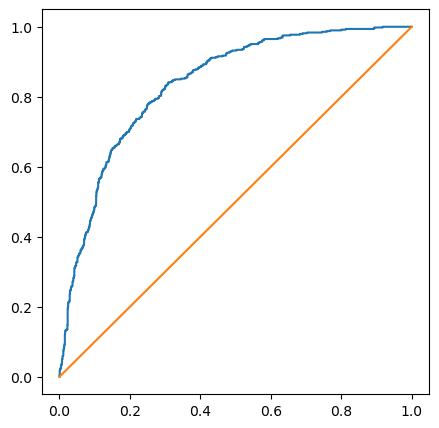

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(5,5))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1])

#### Area under the ROC curve (AUC)

In [48]:
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)

0.8359001084215382

In [49]:
# Shortcut way of calculating AUC without ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363396349608545

## Parameter Tuning


### K-fold cross-validation

In [50]:
# Putting training logic into function
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse = False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    model = LogisticRegression(solver = 'liblinear')
    model.fit(X, y)
    
    return dv, model

In [51]:
# Putting prediction logic into function
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [52]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]
    
    y_train = df_train.churn.values
    y_val = df_val.churn.values
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

In [53]:
print('auc = %0.3f ± %0.3f' %(np.mean(aucs), np.std(aucs)))

auc = 0.842 ± 0.012


In [54]:
# Putting training logic into function
def train(df, y, C):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse = False)
    dv.fit(cat)
    
    X = dv.transform(cat)
    model = LogisticRegression(solver = 'liblinear', C=C)
    model.fit(X, y)
    
    return dv, model

In [55]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []
    
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)
        
    print('C=%s, auc = %0.3f ± %0.3f' %(C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.840 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.008


In [56]:
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc= %.3f' %auc)

auc= 0.858


In [57]:
import pickle

with open('churn-model.bin', 'wb') as f_out:
    pickle.dump((dv, model), f_out)
    f_out.close()

In [65]:
import requests
url = 'http://localhost:9696/predict'
response = requests.post(url, json=customer)
result = response.json()

In [66]:
result


{'churn': False, 'churn_probability': 0.020205691391494918}